Thông tin dữ liệu ratings.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB
None

Thông tin dữ liệu processed_movies.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   userId   1000000 non-null  int64  
 1   movieId  1000000 non-null  int64  
 2   title    1000000 non-null  object 
 3   year     1000000 non-null  float64
 4   rating   1000000 non-null  float64
 5   genres   1000000 non-null  object 
 6   tag      1000000 non-null  object 
 7   content  1000000 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 61.0+ MB
None


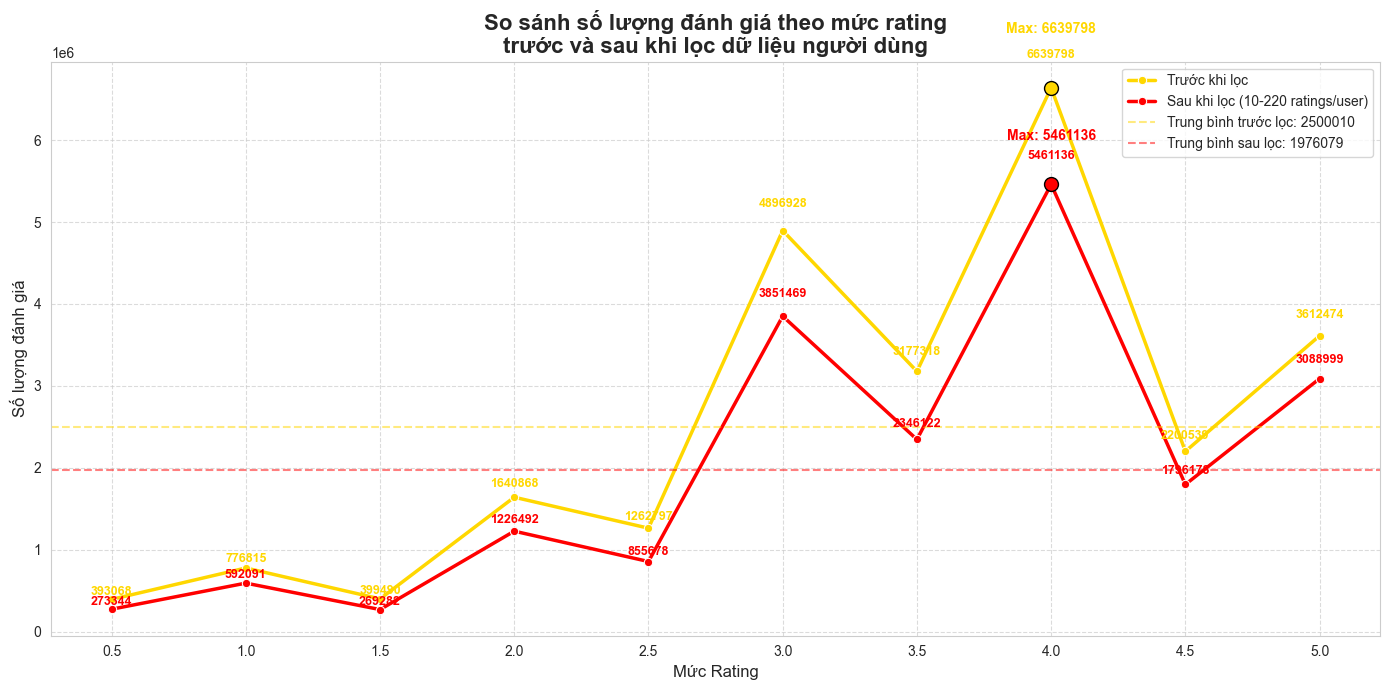

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đảm bảo thư mục notebooks tồn tại
os.makedirs("notebooks", exist_ok=True)

# Load dữ liệu
tep_ratings_goc = r"E:\ĐATN\data\ratings.csv"  # Dữ liệu gốc trước khi lọc
tep_phim_da_xuly = r"E:\ĐATN\data\processed_movies.csv"  # Dữ liệu phim đã xử lý

# Đọc dữ liệu ratings.csv (trước khi lọc)
danh_gia_goc = pd.read_csv(tep_ratings_goc)
print("Thông tin dữ liệu ratings.csv (trước khi lọc):")
print(danh_gia_goc.info())

# Đọc dữ liệu processed_movies.csv (sau khi lọc)
phim_da_xuly = pd.read_csv(tep_phim_da_xuly)
print("\nThông tin dữ liệu processed_movies.csv (sau khi lọc):")
print(phim_da_xuly.info())

# ---- Bắt đầu xử lý ----
# Trước khi lọc: tổng số lượng đánh giá theo từng mức rating
so_luong_danh_gia_truoc_loc = danh_gia_goc["rating"].value_counts().sort_index()

# Sau khi lọc: chỉ giữ các userId tồn tại trong phim_da_xuly
danh_sach_user_da_loc = phim_da_xuly["userId"].unique()
danh_gia_sau_loc = danh_gia_goc[danh_gia_goc["userId"].isin(danh_sach_user_da_loc)]
so_luong_danh_gia_sau_loc = danh_gia_sau_loc["rating"].value_counts().sort_index()

# Các mức rating từ 0.5 đến 5.0
muc_danh_gia = [i * 0.5 for i in range(1, 11)]

# Đảm bảo các mức rating đều có dữ liệu
so_luong_danh_gia_truoc_loc = so_luong_danh_gia_truoc_loc.reindex(muc_danh_gia, fill_value=0)
so_luong_danh_gia_sau_loc = so_luong_danh_gia_sau_loc.reindex(muc_danh_gia, fill_value=0)

# ---- Vẽ biểu đồ ----
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

# Vẽ hai đường
sns.lineplot(x=muc_danh_gia, y=so_luong_danh_gia_truoc_loc.values, label="Trước khi lọc (ratings.csv)", color="gold", marker="o", linewidth=2.5)
sns.lineplot(x=muc_danh_gia, y=so_luong_danh_gia_sau_loc.values, label="Sau khi lọc (processed_movies.csv)", color="red", marker="o", linewidth=2.5)

# Thêm số lượng đánh giá tại từng điểm (dịch lên 5% giá trị y + 1200 đơn vị)
for x, y in zip(muc_danh_gia, so_luong_danh_gia_truoc_loc.values):
    plt.text(x, y + y * 0.05 + 1500, f"{y}", ha='center', va='bottom', fontsize=9, color="gold", fontweight='bold')

for x, y in zip(muc_danh_gia, so_luong_danh_gia_sau_loc.values):
    plt.text(x, y + y * 0.05 + 1500, f"{y}", ha='center', va='bottom', fontsize=9, color="red", fontweight='bold')

# Thêm đường trung bình
trung_binh_truoc_loc = so_luong_danh_gia_truoc_loc.mean()
trung_binh_sau_loc = so_luong_danh_gia_sau_loc.mean()

plt.axhline(trung_binh_truoc_loc, color='gold', linestyle='--', alpha=0.5, label=f"Trung bình trước lọc: {trung_binh_truoc_loc:.0f}")
plt.axhline(trung_binh_sau_loc, color='red', linestyle='--', alpha=0.5, label=f"Trung bình sau lọc: {trung_binh_sau_loc:.0f}")

# Đánh dấu điểm cao nhất
muc_danh_gia_max_truoc = so_luong_danh_gia_truoc_loc.idxmax()
so_luong_max_truoc = so_luong_danh_gia_truoc_loc.max()
plt.scatter(muc_danh_gia_max_truoc, so_luong_max_truoc, color="gold", s=100, edgecolors='black', zorder=5)
plt.text(muc_danh_gia_max_truoc, so_luong_max_truoc + so_luong_max_truoc * 0.1, f"Max: {so_luong_max_truoc}", ha='center', color='gold', fontweight='bold')

muc_danh_gia_max_sau = so_luong_danh_gia_sau_loc.idxmax()
so_luong_max_sau = so_luong_danh_gia_sau_loc.max()
plt.scatter(muc_danh_gia_max_sau, so_luong_max_sau, color="red", s=100, edgecolors='black', zorder=5)
plt.text(muc_danh_gia_max_sau, so_luong_max_sau + so_luong_max_sau * 0.1, f"Max: {so_luong_max_sau}", ha='center', color='red', fontweight='bold')

# Các cài đặt khác
plt.xlabel("Mức đánh giá", fontsize=12)
plt.ylabel("Số lượng đánh giá", fontsize=12)
plt.title("So sánh số lượng đánh giá theo mức rating\ntrước và sau khi lọc dữ liệu người dùng", fontsize=16, fontweight='bold')
plt.xticks(muc_danh_gia, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd

# Đường dẫn tới file train
df = pd.read_csv(r"D:\ĐATN_TranDucLong_124211_KHMT_3\data\train_dl.csv")

# Gán nhãn: 1 nếu rating >= 3.5, ngược lại là 0
df['label'] = (df['rating'] >= 3.5).astype(int)

# Đếm số lượng mẫu theo từng nhãn
label_counts = df['label'].value_counts()
print(label_counts)

# Tính tỉ lệ phần trăm
label_distribution = df['label'].value_counts(normalize=True) * 100
print(label_distribution)


label
1    785874
0    645734
Name: count, dtype: int64
label
1    54.894496
0    45.105504
Name: proportion, dtype: float64


In [ ]:
import pandas as pd

# Đường dẫn tới file train
df = pd.read_csv(r"D:\ĐATN_TranDucLong_124211_KHMT_3\data\test_dl.csv")

# Gán nhãn: 1 nếu rating >= 3.5, ngược lại là 0
df['label'] = (df['rating'] >= 3.5).astype(int)

# Đếm số lượng mẫu theo từng nhãn
label_counts = df['label'].value_counts()
print(label_counts)

# Tính tỉ lệ phần trăm
label_distribution = df['label'].value_counts(normalize=True) * 100
print(label_distribution)


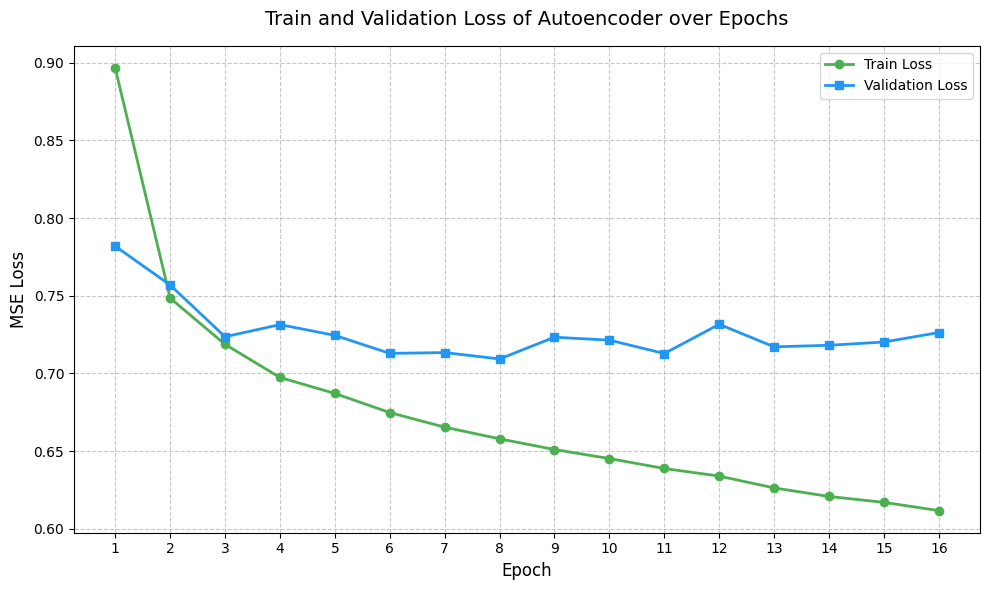

In [1]:
import matplotlib.pyplot as plt

# Dữ liệu Train Loss và Validation Loss từ result_train_val_autoencoder.txt
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
train_loss = [0.8966, 0.7485, 0.7187, 0.6974, 0.6871, 0.6748, 0.6654, 0.6579, 
              0.6510, 0.6452, 0.6388, 0.6339, 0.6263, 0.6208, 0.6170, 0.6117]
val_loss = [0.7819, 0.7569, 0.7236, 0.7314, 0.7245, 0.7129, 0.7134, 0.7093, 
            0.7233, 0.7214, 0.7128, 0.7316, 0.7171, 0.7181, 0.7202, 0.7263]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Train Loss', color='#4CAF50', marker='o', linewidth=2)
plt.plot(epochs, val_loss, label='Validation Loss', color='#2196F3', marker='s', linewidth=2)

# Cấu hình biểu đồ
plt.title('Train and Validation Loss of Autoencoder over Epochs', fontsize=14, pad=15)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE Loss', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=10)
plt.xticks(epochs)  # Hiển thị tất cả các epoch trên trục x
plt.tight_layout()

# Lưu biểu đồ
plt.savefig('autoencoder_loss_plot.png', dpi=300, bbox_inches='tight')
plt.show()

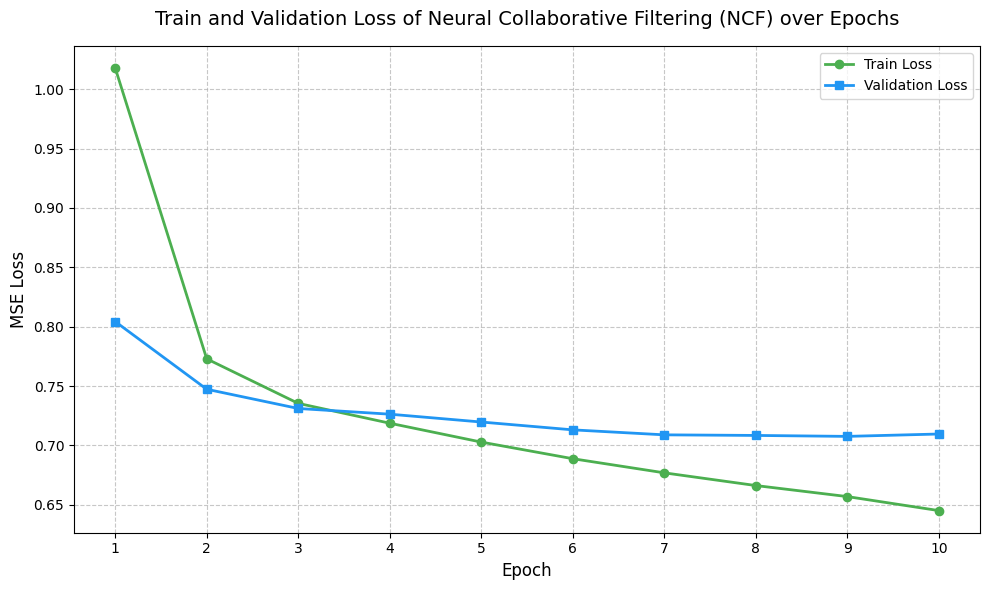

In [2]:
import matplotlib.pyplot as plt

# Dữ liệu Train Loss và Validation Loss từ result_train_val_ncf.txt
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_loss = [1.0179, 0.7729, 0.7354, 0.7187, 0.7028, 0.6888, 0.6769, 0.6662, 0.6569, 0.6451]
val_loss = [0.8043, 0.7473, 0.7311, 0.7263, 0.7197, 0.7131, 0.7089, 0.7084, 0.7076, 0.7096]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Train Loss', color='#4CAF50', marker='o', linewidth=2)
plt.plot(epochs, val_loss, label='Validation Loss', color='#2196F3', marker='s', linewidth=2)

# Cấu hình biểu đồ
plt.title('Train and Validation Loss of Neural Collaborative Filtering (NCF) over Epochs', fontsize=14, pad=15)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE Loss', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=10)
plt.xticks(epochs)  # Hiển thị tất cả các epoch trên trục x
plt.tight_layout()

# Lưu biểu đồ
plt.savefig('ncf_loss_plot.png', dpi=300, bbox_inches='tight')
plt.show()

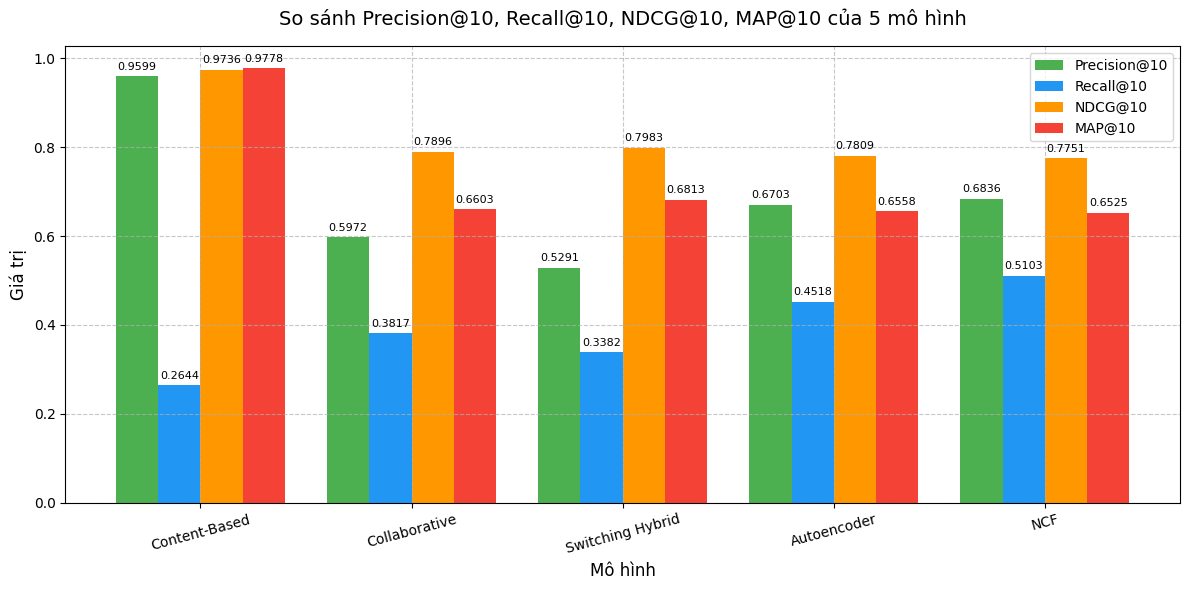

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu từ Bảng 3.8
models = ['Content-Based', 'Collaborative', 'Switching Hybrid', 'Autoencoder', 'NCF']
precision = [0.9599, 0.5972, 0.5291, 0.6703, 0.6836]
recall = [0.2644, 0.3817, 0.3382, 0.4518, 0.5103]
ndcg = [0.9736, 0.7896, 0.7983, 0.7809, 0.7751]
map_score = [0.9778, 0.6603, 0.6813, 0.6558, 0.6525]

# Cấu hình biểu đồ
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(models))

# Vẽ các cột
bars1 = ax.bar(index - bar_width*1.5, precision, bar_width, label='Precision@10', color='#4CAF50')
bars2 = ax.bar(index - bar_width*0.5, recall, bar_width, label='Recall@10', color='#2196F3')
bars3 = ax.bar(index + bar_width*0.5, ndcg, bar_width, label='NDCG@10', color='#FF9800')
bars4 = ax.bar(index + bar_width*1.5, map_score, bar_width, label='MAP@10', color='#F44336')

# Cấu hình trục và tiêu đề
ax.set_xlabel('Mô hình', fontsize=12)
ax.set_ylabel('Giá trị', fontsize=12)
ax.set_title('So sánh Precision@10, Recall@10, NDCG@10, MAP@10 của 5 mô hình', fontsize=14, pad=15)
ax.set_xticks(index)
ax.set_xticklabels(models, rotation=15)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, linestyle='--', alpha=0.7)

# Hiển thị giá trị trên cột
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{height:.4f}', 
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
